In [ ]:
pip install plotly

In [68]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import datetime
import calendar
from scipy.stats import linregress
import seaborn as sns

# File to Load
file_to_load = "output_data/cleaned_avo.csv"

# Read Avocado File and store into Pandas data frame
avocado_data = pd.read_csv(file_to_load)

# Preview of the DataFrame
avocado_data.head()

,Unnamed: 0,Date,Average Price,Total Volume,Hass Small,Hass Large,Hass XLarge,Total Bags,Small Bags,Large Bags,XLarge Bags,Type,Year,Region,Total Sales
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,85434.70
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,74083.92
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,109944.80
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,85311.52
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,65330.69


In [44]:
delete_row = avocado_data[avocado_data["Region"]=='TotalUS'].index
avocado_data = avocado_data.drop(delete_row)
avocado_data=avocado_data.drop(columns='Unnamed: 0',axis=1)
avocado_data['Total Sales']=''
Total=avocado_data['Average Price']*avocado_data['Total Volume']
avocado_data['Total Sales']=Total
avocado_data['Total Sales']= avocado_data['Total Sales'].map("${:.2f}".format)
avocado_data

,Date,Average Price,Total Volume,Hass Small,Hass Large,Hass XLarge,Total Bags,Small Bags,Large Bags,XLarge Bags,Type,Year,Region,Total Sales
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,$85434.70
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,$74083.92
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,$109944.80
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,$85311.52
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,$65330.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17906,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,$27831.97
17907,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,$23748.55
17908,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,$25743.84
17909,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,$31276.07


In [45]:
#count avocados by type (conventional vs organic)
group = avocado_data.groupby("Type")
total = group["Total Volume"].sum()


print(total)

Type
conventional    9.385999e+09
organic         2.726631e+08
Name: Total Volume, dtype: float64


Text(0.5, 1.0, 'Type of Avocado Sales from 2015 - 2018')

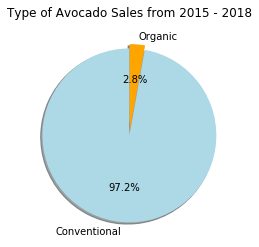

In [46]:
#Create PieChart
labels = ["Conventional", "Organic"]
counts = [9.385999e+09, 2.726631e+08]

avocado_type_df = pd.DataFrame({
    "counts": counts,
    "labels": labels
})

fig, ax = plt.subplots()

avocado_type_df.plot.pie(y= "counts", explode = (0.05, 0), labels = labels, colors = ["lightblue", "orange"], autopct="%1.1f%%", shadow=True, startangle = 90, legend = False, ax=ax)


ax.set_ylabel("")
ax.set_title("Type of Avocado Sales from 2015 - 2018")


In [47]:
#Group data by year
group_by_year = avocado_data.groupby(["Type","Year"])
total_by_year = group_by_year["Total Volume"].sum()/1000000
total_by_year

Type          Year
conventional  2015    2672.913320
              2016    2919.990424
              2017    2964.395912
              2018     828.699669
organic       2015      55.300121
              2016      81.740325
              2017     105.216224
              2018      30.406417
Name: Total Volume, dtype: float64

In [48]:
#Create DataFrame
type_year_bar = pd.DataFrame({
    "Year Totals": total_by_year
    })
type_year_bar.head(10)

Year Totals
Type         Year             
conventional 2015  2672.913320
             2016  2919.990424
             2017  2964.395912
             2018   828.699669
organic      2015    55.300121
             2016    81.740325
             2017   105.216224
             2018    30.406417

Text(0, 0.5, 'Units Sold (in millions)')

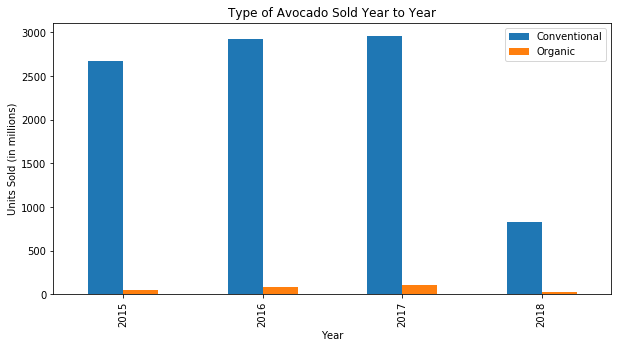

In [49]:
#Create BarChart

conventional = [2672.913320, 2919.990424, 2964.395912, 828.699669]
organic = [55.300121, 81.740325, 105.216224, 30.406417]
index = [2015, 2016, 2017, 2018]

df_multiplot = pd.DataFrame({
    "Conventional": conventional,
    "Organic": organic}, index = index)

multi_plot = df_multiplot.plot(kind = "bar", figsize=(10,5))

plt.title("Type of Avocado Sold Year to Year")
plt.xlabel("Year")
plt.ylabel("Units Sold (in millions)")

In [50]:
#convert object back to float
avocado_data['Total Sales']=avocado_data['Total Sales'].str.replace('$',' ',regex=True).astype(float)

data15=avocado_data[avocado_data['Year']==2015].groupby('Region')
data16=avocado_data[avocado_data['Year']==2016].groupby('Region')
data17=avocado_data[avocado_data['Year']==2017].groupby('Region')
data18=avocado_data[avocado_data['Year']==2018].groupby('Region')

In [51]:
#totalvol(million)
T5=data15['Total Volume'].sum()/1000000
T6=data16['Total Volume'].sum()/1000000
T7=data17['Total Volume'].sum()/1000000
T8=data18['Total Volume'].sum()/1000000
totalvol_sum=pd.DataFrame({"2015": T5,
                            "2016":T6,
                              "2017":T7,
                              "2018":T8
                              })


In [110]:
Without_8=totalvol_sum.drop(['California','GreatLakes','Midsouth','Northeast','Plains','SouthCentral','Southeast','West'])
Without_8['Total']=''
sum_column = Without_8["2015"] + Without_8["2016"]+Without_8["2017"]+Without_8["2018"]
Without_8['Total']=sum_column
Without_8.head()

,2015,2016,2017,2018,Total
Region,,,,,
Albany,4.029896,5.264336,5.231582,1.541986,16.067800
Atlanta,23.231698,28.326878,28.815120,8.231422,88.605119
BaltimoreWashington,40.645580,40.893802,41.015634,12.158903,134.713919
Boise,3.784357,4.653510,4.760561,1.214760,14.413188
Boston,27.454992,30.571315,30.610672,8.637006,97.273985


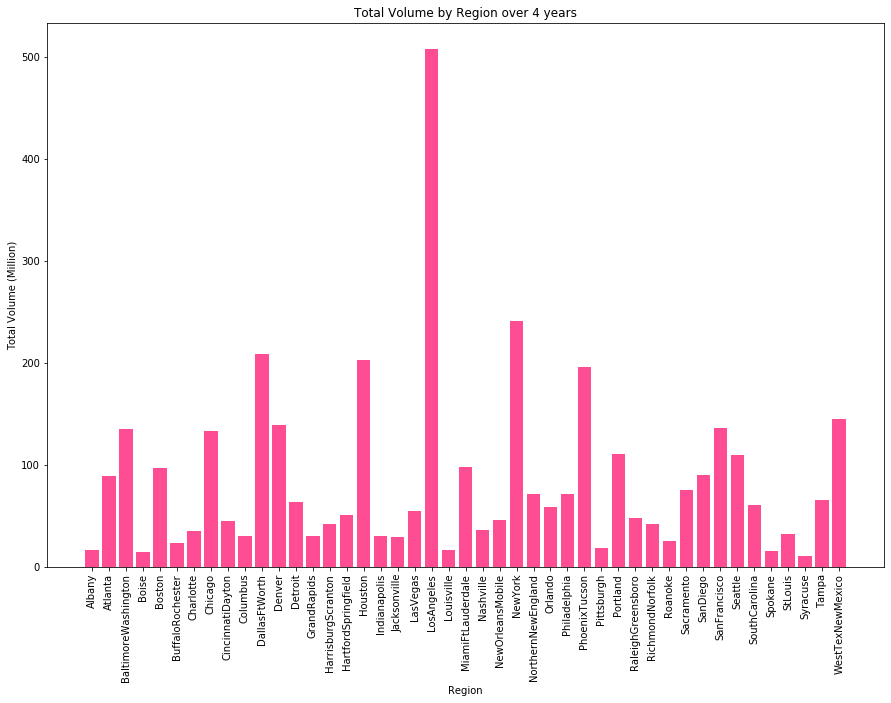

In [53]:
x_axis = np.arange(len(Without_8))
plt.figure(figsize=(15,10))
tick_locations = [value for value in x_axis]
plt.bar(x_axis,Without_8['Total'], color="#ff4d94")
plt.title('Total Volume by Region over 4 years')
plt.xlabel('Region')
plt.ylabel('Total Volume (Million)')
plt.xticks(tick_locations, Without_8.index,rotation='vertical')
plt.show()

[Text(0, 0.5, 'Total Volume (Million)'),
 Text(0.5, 1.0, 'Top 8 Regions with Total Volume over 4 years')]

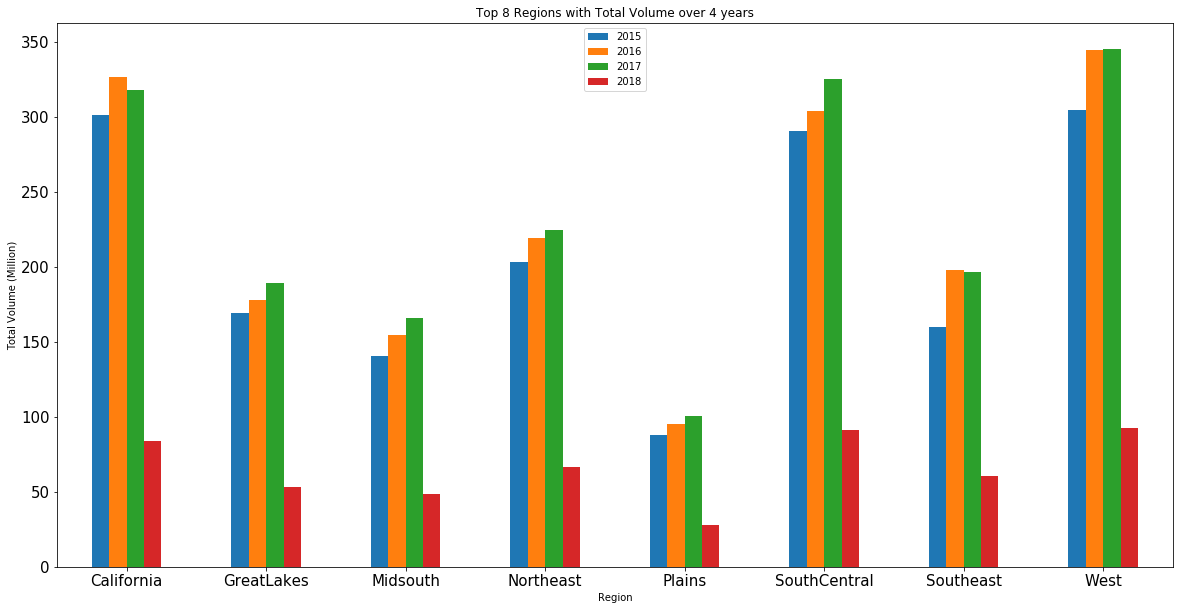

In [111]:
top8=totalvol_sum.loc[['California','GreatLakes','Midsouth','Northeast','Plains','SouthCentral','Southeast','West']]
fig, ax = plt.subplots() 
top8.plot(kind='bar',figsize=(20,10),rot=0,fontsize=15,ax=ax).legend(loc='upper center')
ax.set(title="Top 8 Regions with Total Volume over 4 years",ylabel='Total Volume (Million)')


In [112]:
Without_8['city']=''
newcity=Without_8.index+' city'
Without_8['city']=newcity
Without_8

,2015,2016,2017,2018,Total,city
Region,,,,,,
Albany,4.029896,5.264336,5.231582,1.541986,16.067800,Albany city
Atlanta,23.231698,28.326878,28.815120,8.231422,88.605119,Atlanta city
BaltimoreWashington,40.645580,40.893802,41.015634,12.158903,134.713919,BaltimoreWashington city
Boise,3.784357,4.653510,4.760561,1.214760,14.413188,Boise city
Boston,27.454992,30.571315,30.610672,8.637006,97.273985,Boston city
BuffaloRochester,5.893235,7.205112,7.740306,2.123818,22.962470,BuffaloRochester city
Charlotte,9.487343,10.586721,11.895590,3.585890,35.555544,Charlotte city
Chicago,41.494717,39.612636,40.980754,11.614232,133.702339,Chicago city
CincinnatiDayton,11.756176,14.020866,15.146678,3.598287,44.522008,CincinnatiDayton city


In [130]:
Without_8['city'].unique()

array(['Albany city', 'Atlanta city', 'BaltimoreWashington city',
       'Boise city', 'Boston city', 'BuffaloRochester city',
       'Charlotte city', 'Chicago city', 'CincinnatiDayton city',
       'Columbus city', 'DallasFtWorth city', 'Denver city',
       'Detroit city', 'GrandRapids city', 'HarrisburgScranton city',
       'HartfordSpringfield city', 'Houston city', 'Indianapolis city',
       'Jacksonville city', 'LasVegas city', 'LosAngeles city',
       'Louisville city', 'MiamiFtLauderdale city', 'Nashville city',
       'NewOrleansMobile city', 'NewYork city', 'NorthernNewEngland city',
       'Orlando city', 'Philadelphia city', 'PhoenixTucson city',
       'Pittsburgh city', 'Portland city', 'RaleighGreensboro city',
       'RichmondNorfolk city', 'Roanoke city', 'Sacramento city',
       'SanDiego city', 'SanFrancisco city', 'Seattle city',
       'SouthCarolina city', 'Spokane city', 'StLouis city',
       'Syracuse city', 'Tampa city', 'WestTexNewMexico city'],
      dt

In [113]:
# File to Load
file = "./Resources/p.csv"

# Read Avocado File and store into Pandas data frame
popdata = pd.read_csv(file, encoding="ISO-8859-1")
df_pop=popdata.drop([
    'GEO.id', 'GEO.id2','GEO.display-label','GCT_STUB.target-geo-id','GCT_STUB.target-geo-id2','GCT_STUB.display-label'
], axis=1)
df_pop=df_pop.drop(0)
df_pop=df_pop.rename(
                        columns={"GCT_STUB.display-label.1":"City",
                                     "HD01":"P",
                                     
                                    
                                    })
df_pop['Population']=''
pop=df_pop['P']
sep=pop.str.split("(",expand=True)
population=sep[0]
df_pop["Population"]=population
df_pop

,City,P,Population
1,United States,308745538(r38234),308745538
2,Alabama,4779736(r38235),4779736
3,Auburn city,53380(r38811),53380
4,Birmingham city,212237(r38812),212237
5,Decatur city,55683,55683
...,...,...,...
912,Carolina zona urbana,157832,157832
913,Guaynabo zona urbana,75443,75443
914,Mayagüez zona urbana,70463,70463
915,Ponce zona urbana,132502,132502


Growth: Identify year over year growth

In [ ]:
# Group data by year
year_view = avocado_data.groupby(["Year"])

# Calculations for analysis
total_volume = year_view["Total Volume"].sum()/1000000

# YoY Analysis data frame
YOY_df = pd.DataFrame({
    "Total Volume (in millions)": total_volume,
    })

YOY_df.head()

In [ ]:
# Generate a bar plot showing YoY trends
YOY_df.plot(kind ="bar", title = "YoY Avocado Sales Volume",color=("blue","blue","blue",'coral'))

# Label x-axis
plt.xlabel("Year")
plt.ylabel("Unit Sales (in millions)")

# Show pandas bar plot
plt.show()

In [ ]:
# Formatting data frame
YOY_df = YOY_df.round(2)
YOY_df["Total Volume (in millions)"] = YOY_df["Total Volume (in millions)"].map("{:,}".format)

# Display dataframe
YOY_df.sort_values(by = ["Year"], ascending=False)

Seasonality: Identify month over month trends.

In [ ]:
# Isolate needed columns for MoM trending
MoM_avo = avocado_data.loc[:,["Date", "Total Volume", "Total Sales", "Year"]]
MoM_avo.head()

In [ ]:
# Add month column and extract month using datetime import
MoM_avo["Month"] = pd.DatetimeIndex(MoM_avo['Date']).month
MoM_avo.head()

In [ ]:
# Group data by month
month_view = MoM_avo.groupby(["Month"])

# Calculations for analysis
total_sales = month_view["Total Sales"].sum()/1000000
total_volume = month_view["Total Volume"].sum()/1000000

# YoY Analysis data frame
MoM_df = pd.DataFrame({
 #   "Total Sales ($)": total_sales,
    "Total Volume (in millions)": total_volume,
    })

# Format data
MoM_df = MoM_df.round(2)

MoM_df

In [ ]:
# Create a line chart from grouped MoM_df
MoM_line = MoM_df.plot(kind='line')

# Set the xlabel and ylabel using class methods
MoM_line.set_xlabel("Month")
MoM_line.set_ylabel("Unit Sales (in millions)")
MoM_line.set_title("US Avocado Sales MoM")

# Display MoM line chart
plt.show()

Sunburst chart: Show year and months

In [ ]:
# Data for sunburst chart
MoM_avo.head()

In [ ]:
#Change month to abbreviations
MoM_avo['Month'] = MoM_avo['Month'].apply(lambda x: calendar.month_abbr[x])

In [ ]:
# Create sunburst chart
fig = px.sunburst(MoM_avo, path=['Year', 'Month'], values='Total Volume')
fig.show()

In [ ]:
# Data for linear regression scatter plot
avocado_data["Month"] = pd.DatetimeIndex(avocado_data['Date']).month
avocado_data['Month'] = avocado_data['Month'].apply(lambda x: calendar.month_abbr[x])
avocado_data.head()

In [ ]:
# Setting x and y values
x_values = avocado_data['Average Price']
y_values = avocado_data['Total Volume']

#Line equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Build a scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2,.08),fontsize=15,color="red")

# Incorporate the other graph properties
plt.title("Average Price versus Total Sales Volume")
plt.xlabel('Average Price')
plt.ylabel('Total Sales Volume')
plt.grid(True)

# Save the figure & plot
#plt.savefig("N_LR_Lat-v-Temp.png")
plt.show()

In [ ]:
sns.heatmap(avocado_data.corr(), annot=True)